### Create some nice plots fot the thesis

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

import pickle

import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__name__), '../..')))

from src.processing import windsat_datacube


windsat_path = "../../data/raw/Daily_windsat/"

In [2]:
ds = windsat_datacube(windsat_path)
ds = ds.sel(look = 0)

<xarray.Dataset> Size: 3GB
Dimensions:         (day_number: 24, longitude_grid: 1440, latitude_grid: 720,
                     swath_sector: 2, frequency_band: 2, polarization: 2)
Coordinates:
    lat             (latitude_grid) float32 3kB dask.array<chunksize=(720,), meta=np.ndarray>
    lon             (longitude_grid) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
  * day_number      (day_number) int32 96B 1 2 57 58 84 ... 283 323 324 348 349
Dimensions without coordinates: longitude_grid, latitude_grid, swath_sector,
                                frequency_band, polarization
Data variables: (12/13)
    longitude       (day_number, longitude_grid) float32 138kB dask.array<chunksize=(1, 1440), meta=np.ndarray>
    latitude        (day_number, latitude_grid) float32 69kB dask.array<chunksize=(1, 720), meta=np.ndarray>
    node            (day_number, swath_sector) int32 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    frequency_vpol  (day_number, frequency_band) float32 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    frequency_hpol  (day_number, frequency_band) float32 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    eia_nominal     (day_number, frequency_band) float32 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    ...              ...
    eaa             (day_number, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 398MB dask.array<chunksize=(1, 1, 360, 720, 1), meta=np.ndarray>
    eia             (day_number, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 398MB dask.array<chunksize=(1, 1, 360, 720, 1), meta=np.ndarray>
    tbtoa           (day_number, polarization, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 796MB dask.array<chunksize=(1, 1, 1, 240, 480, 1), meta=np.ndarray>
    quality_flag    (day_number, latitude_grid, longitude_grid, swath_sector) int32 199MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
    surtep_ERA5     (day_number, latitude_grid, longitude_grid, swath_sector) float32 199MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
    airtep_ERA5     (day_number, latitude_grid, longitude_grid, swath_sector) float32 199MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
Attributes: (12/72)
    Conventions:                            CF-1.7
    title:                                  RSS WindSat TOA Brightness Temper...
    version:                                V01.0
    summary:                                The dataset contains RSS WindSat ...
    references:                              [1] T. Meissner et al., Remote S...
    acknowledgement:                        Funded under NASA Grant 80NSSC21K...
    ...                                     ...
    Source_of_ancillary_IMERG_rain_rate:    Huffman, G. et al.,  2019. NASA G...
    Source_of_ancillary_CCMP_wind:          Mears, C. et al., 2023.Remote Sen...
    Source_of_ancillary_ERA5:               ECMWF Reanalysis v5 (ERA5). https...
    Source_of_RSS_WindSat_AS_ECV:           https://www.remss.com/missions/wi...
    Source_of_ancillary_HYCOM_SSS:          Hybrid Coordinate Ocean Model, Gl...
    Source_of_WindSat_L1C_TB:               T. Meissner et al., Remote Sensin...

In [4]:
tbs = ds.tbtoa.sel(day_number = 1, swath_sector = 0, polarization = 1, frequency_band = 1)

tbs = ds.surtep_ERA5.sel(day_number = 1, swath_sector = 0)


Text(0.5, 1.0, '01/01/2017')

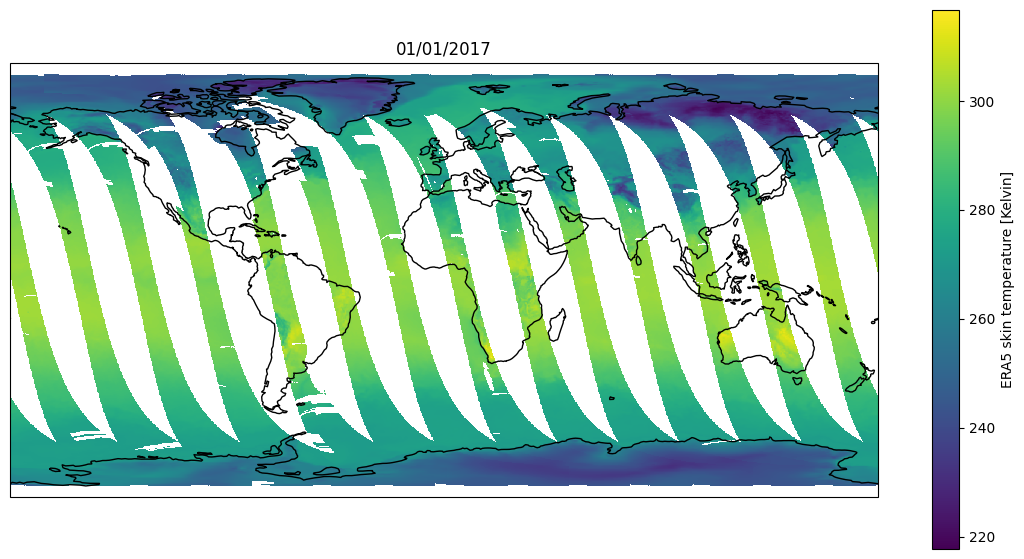

In [13]:
tbswap = tbs.swap_dims(
    {
        "latitude_grid": "lat",
        "longitude_grid": "lon",
    }
)

# Sort the DataArray by latitude and longitude
sorted_tbs = tbswap.sortby(['lat', 'lon'])

fig, ax = plt.subplots(1,1,figsize= (14,7), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=0)})
sorted_tbs.plot(ax = ax)

ax.set_title("")
ax.coastlines("110m")
ax.set_title("01/01/2017")

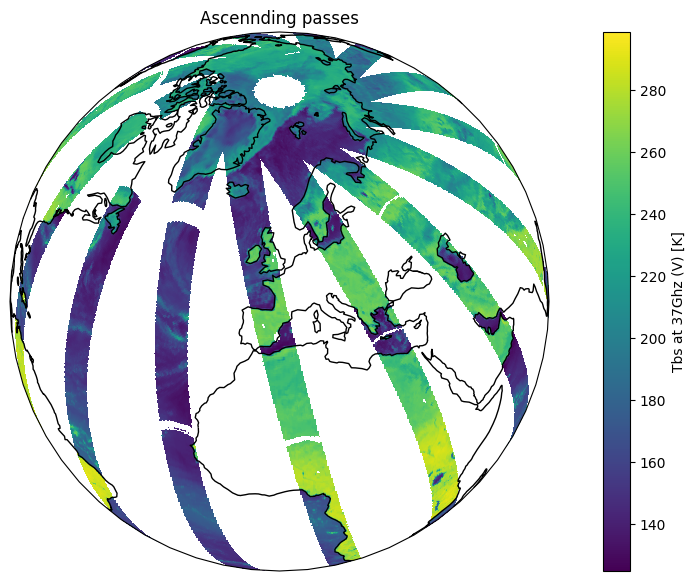

In [48]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Extract the data
tbs = ds.tbtoa.sel(day_number=1, swath_sector=0, polarization=1, frequency_band=1)
tbswap = tbs.swap_dims(
    {
        "latitude_grid": "lat",
        "longitude_grid": "lon",
    }
)

# Sort the DataArray by latitude and longitude
sorted_tbs = tbswap.sortby(['lat', 'lon'])

# Extract data, lat, and lon
data = sorted_tbs.values
lat = sorted_tbs['lat'].values
lon = sorted_tbs['lon'].values

# Create a meshgrid for lat and lon
lon2d, lat2d = np.meshgrid(lon, lat)

# Create the plot with NearsidePerspective projection
fig, ax = plt.subplots(1, 1, figsize=(14, 7), subplot_kw={"projection": ccrs.NearsidePerspective(central_latitude=45)})

# Plot the data using pcolormesh
mesh = ax.pcolormesh(lon2d, lat2d, data, transform=ccrs.PlateCarree(), cmap='viridis')

# Add coastlines and colorbar
ax.coastlines("110m")
fig.colorbar(mesh, ax=ax, orientation='vertical', label='Tbs at 37Ghz (V) [K]')

# Set title and show the plot
ax.set_title("Ascennding passes")
plt.show()


### RFI over Continental US


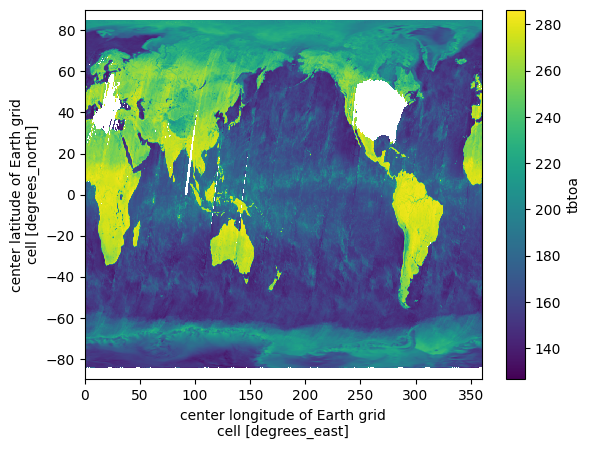

In [62]:
rfi_example = ds.tbtoa.sel(swath_sector = 1, polarization = 1, frequency_band = 1).swap_dims(
    {
        "latitude_grid": "lat",
        "longitude_grid": "lon",
    }
)

# Sort the DataArray by latitude and longitude
sorted_rfi = rfi_example.sortby(['lat', 'lon'])


Text(0.5, 0, 'Tb 37GHz (H) Descending pass')

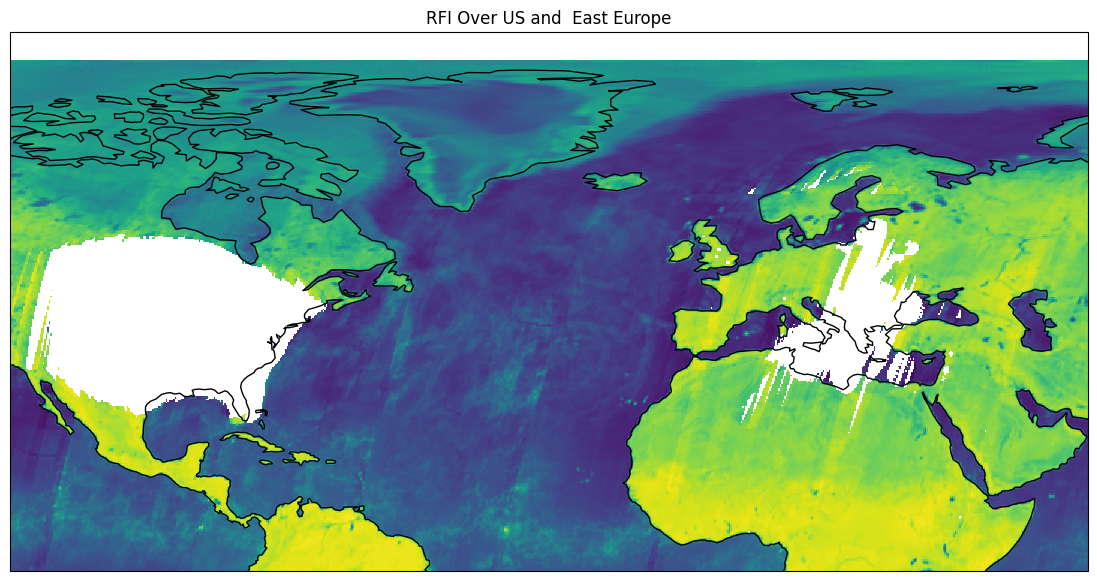

In [79]:

fig, ax = plt.subplots(1,1,figsize= (14,7), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=0)})

ax.set_title("")
ax.coastlines("110m")

sorted_rfi.mean(dim="day_number").plot(ax= ax, add_colorbar = False)

ax.set_ylim([0,90])
ax.set_xlim([-120,60])

ax.set_title("RFI Over US and  East Europe")
ax.set_xlabel("Tb 37GHz (H) Descending pass")

### Keras has some model plotting functions 


In [2]:
os.system("dot -version")

1

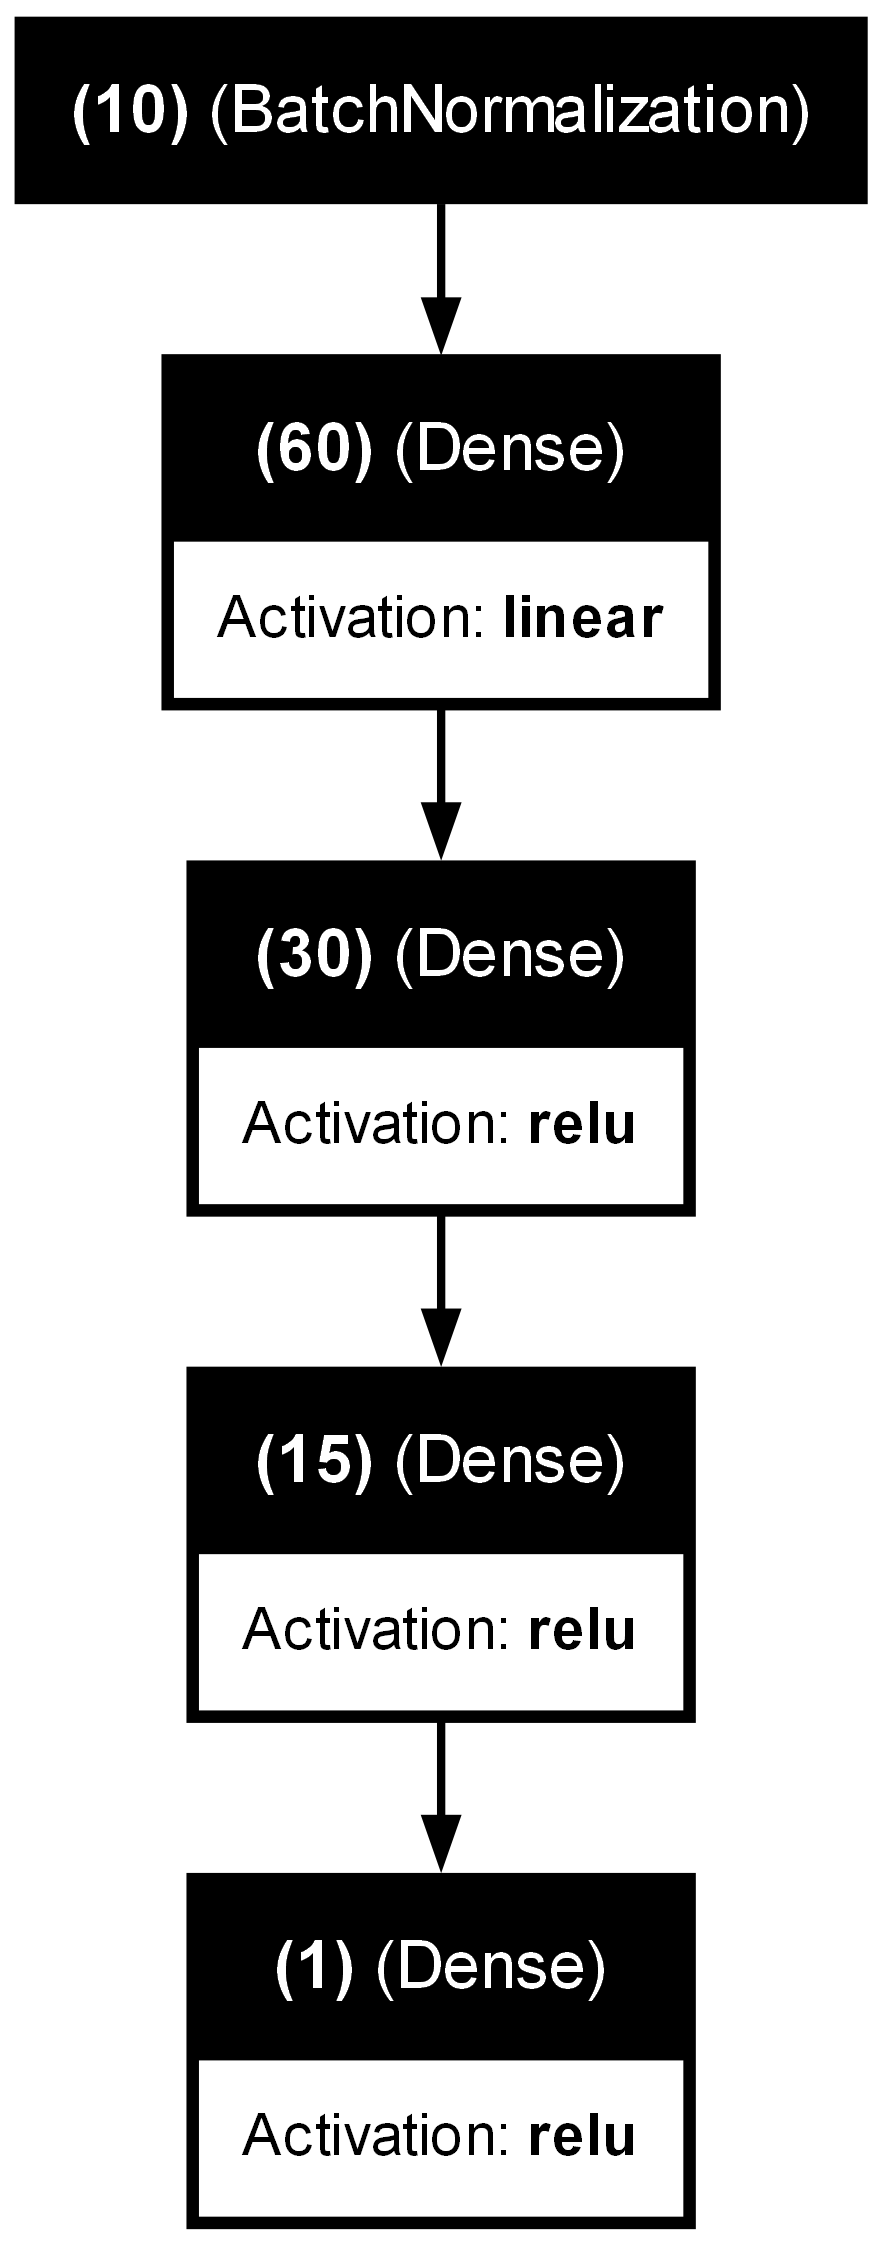

In [66]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

import os

models_path = "../../models/"

datestring = "WSMv2_A_2024_06_28T184738"
model_path = os.path.join(models_path, datestring + ".keras")
history_path = os.path.join(models_path, datestring + "_history")

model = load_model(model_path)
# model.summary()

# Change the name of the layers to display the shape in a compact form:
neurons = [10, 60,30,15,1]
custom_names = [
    f"({n})" for n in neurons
]
for layer, name in zip(model.layers, custom_names):
    layer.name = name


# Save the model into a png file
plot_file = os.path.join(models_path, datestring + "_model_plot.png")
plot_model(model, to_file=plot_file, show_shapes=False, show_layer_names=True, show_layer_activations=True, dpi=300, rankdir="TB")


In [37]:
model.layers[0].name

'batch_normalization ((None, 10))'

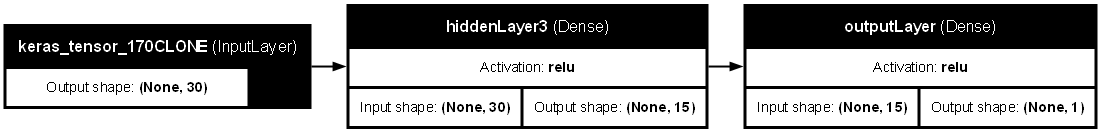

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import os

# Tu modelo cargado previamente
models_path = "../../models/"
datestring = "WSMv2_A_2024_06_28T184738"
model_path = os.path.join(models_path, datestring + ".keras")

model = load_model(model_path)

# Divide el modelo en dos submodelos
# Submodelo 1: desde la capa 0 hasta la capa 2
submodel1 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

# Submodelo 2: desde la salida de la capa 2 hasta la capa final
# Necesitamos recrear la estructura de las capas de la segunda parte
input_layer = model.layers[2].output
hidden_layer3 = model.layers[3](input_layer)
output_layer = model.layers[4](hidden_layer3)

submodel2 = Model(inputs=input_layer, outputs=output_layer)

# Guardar los submodelos en archivos png separados
plot_file1 = os.path.join(models_path, datestring + "_submodel1_plot.png")
plot_model(submodel1, to_file=plot_file1, show_shapes=True, show_layer_names=True, show_layer_activations=True, dpi=72, rankdir='LR')

plot_file2 = os.path.join(models_path, datestring + "_submodel2_plot.png")
plot_model(submodel2, to_file=plot_file2, show_shapes=True, show_layer_names=True, show_layer_activations=True, dpi=72, rankdir='LR')


---
### Training history plot

Plot training history for all models in a single plot.



In [2]:
# Load all the training histories

model_folder = "..\..\models"
model_strings =[
    "WSMv1_A_2024_07_23T135732",
    "WSMv1_D_2024_07_23T120006",
    "WSMv2_A_2024_07_23T202640",
    "WSMv2_D_2024_07_23T180208"
]


model_histories = []

for ms in model_strings:
    history_path = os.path.join(model_folder, ms + "_history")

    with open(history_path, "rb") as file:
        history = pickle.load(file)
        model_histories.append(history)

Text(0.5, 1.0, '')

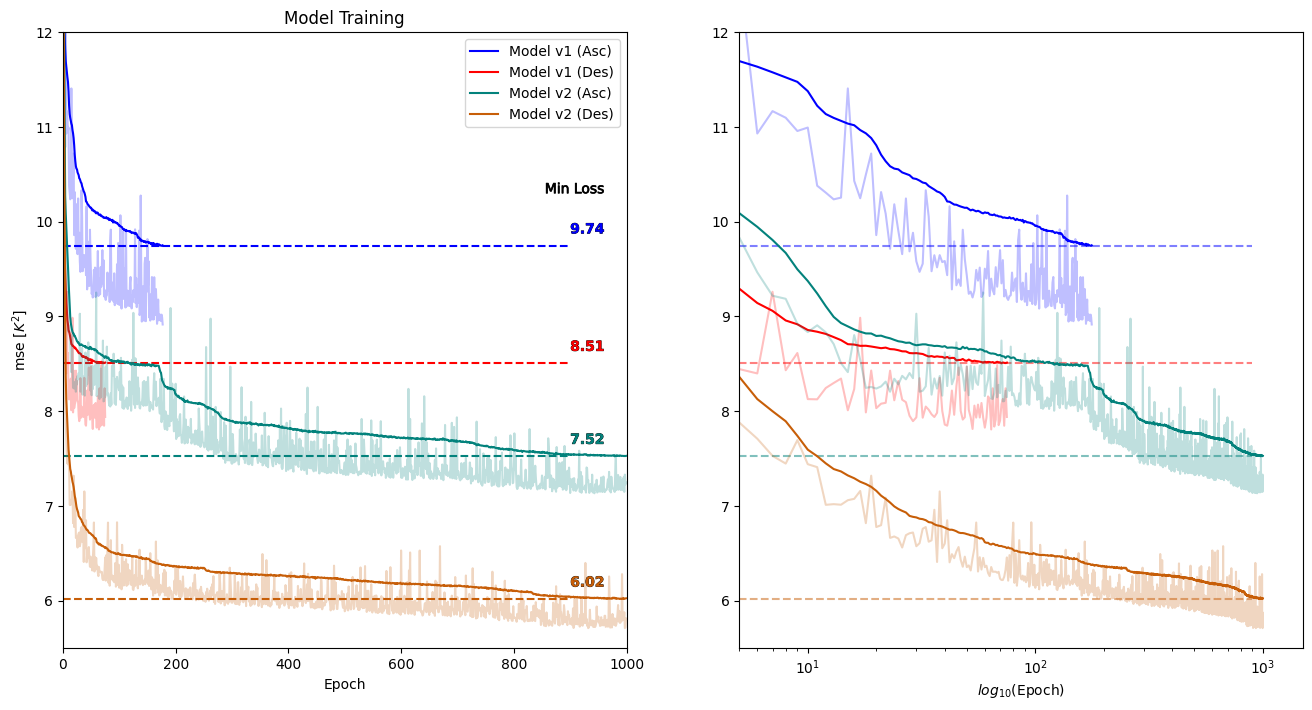

In [3]:

colors = [
    "Blue",
    "Red",
    "#03827c",
    "#c75e08",
]

labels = [
    "Model v1 (Asc)",
    "Model v1 (Des)",
    "Model v2 (Asc)",
    "Model v2 (Des)",
]

training_loss_kw ={
    "alpha" : 1,
}

test_loss_kw ={
    "alpha" : 0.25,
}

xmin, xmax = [0, 900]

fig, axs = plt.subplots(1,2,figsize = (16,8))
ax = axs[0]
for mh, color, label in zip(model_histories, colors, labels):

    # Plot training as filled color
    ax.plot(mh["loss"], c=color, label=label, **training_loss_kw)

    # Plot testing as transparent color
    ax.plot(mh["val_loss"], c=color, label=None, **test_loss_kw)


    # Add a dotted line with the lowest loss 

    min_loss = min(mh["loss"])
    min_val_loss = min(mh["val_loss"])
    
    ax.hlines(y=min_loss, xmin=xmin, xmax=xmax, colors=color, label=None, linestyles="dashed")

    # Print the minimun loss value for each model.
    text_loss = ax.text(xmax, min_loss + 0.1, f"{min_loss:.2f}", color=color, verticalalignment='bottom', fontsize=10, fontweight='bold')
    text_loss.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='black'), path_effects.Normal()])

# Add a label on top of the numbers:
extra_text = ax.text(xmax*0.95, 10.3, "Min Loss")
extra_text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='black'), path_effects.Normal()])


# General plot options
ax.set_xscale("linear")
ax.set_xlim([0,1000])

ax.set_ylim([5.5,12])

ax.set_title("Model Training")
ax.set_ylabel("mse [$K^2$]")
ax.set_xlabel("Epoch")
ax.legend(loc="upper right")

## Second plot in log scale for epoch

ax = axs[1]
for mh, color, label in zip(model_histories, colors, labels):

    # Plot training as filled color
    ax.plot(mh["loss"], c=color, label=label, **training_loss_kw)

    # Plot testing as transparent color
    ax.plot(mh["val_loss"], c=color, label=None, **test_loss_kw)


    # Add a dotted line with the lowest loss 
    xmin, xmax = [0, 900]
    min_loss = min(mh["loss"])
    min_val_loss = min(mh["val_loss"])
    
    ax.hlines(y=min_loss, xmin=xmin, xmax=xmax, colors=color, label=None, linestyles="dashed", alpha = 0.5)


# General plot options

ax.set_xscale("log") # This is interesting but its also a mess
ax.set_xlabel("$log_{10}$(Epoch)")
ax.set_xlim([5,1500])
ax.set_ylim([5.5,12])

ax.set_title("")


## Split training in versions

get the training history in two separated graphs, with the same y scale for comparison

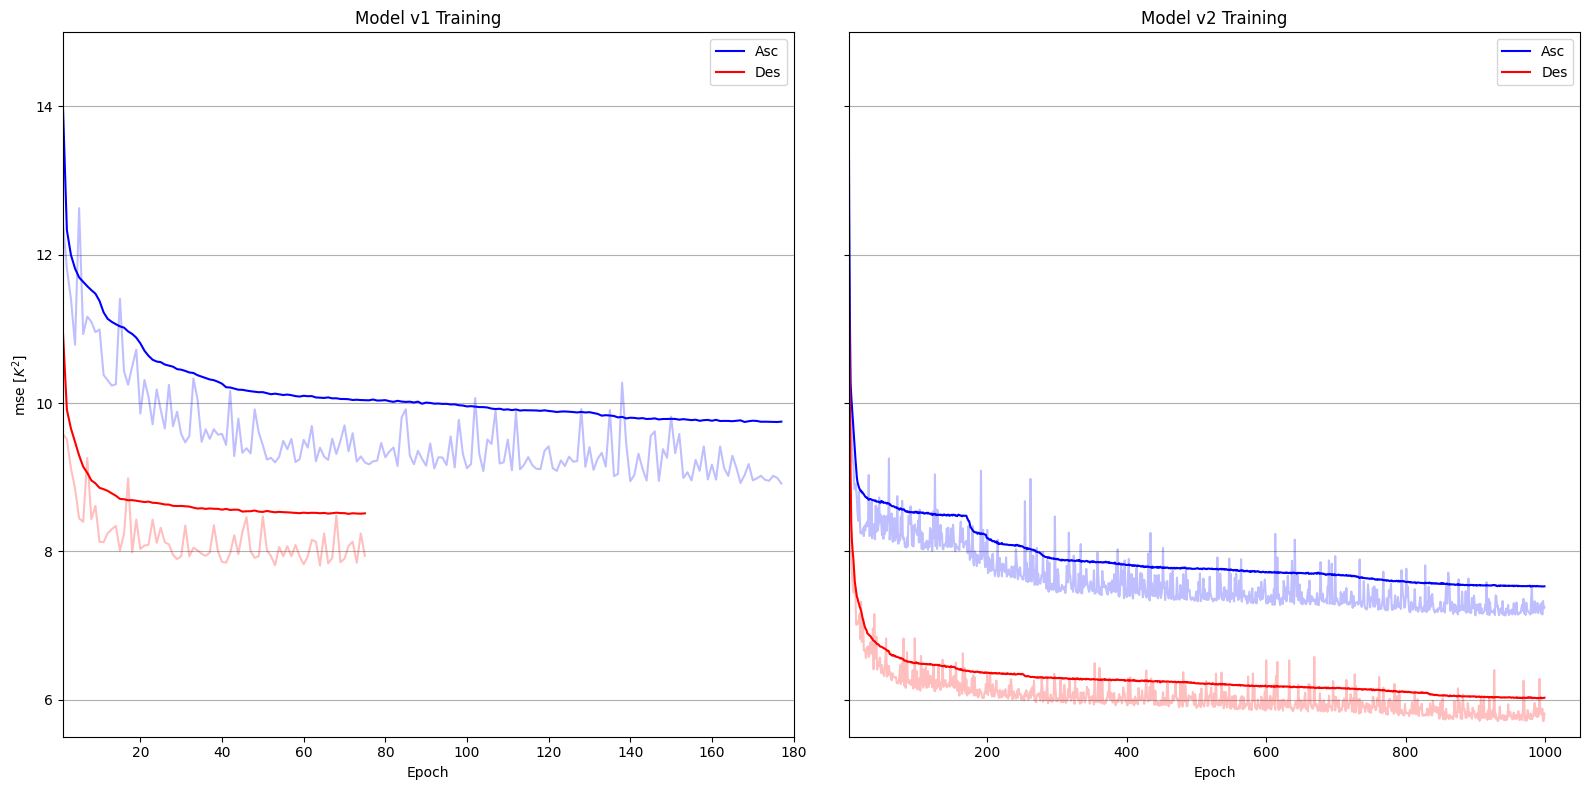

In [3]:

colors = [
    "Blue",
    "Red",
]

labels = [
    "Asc",
    "Des"
]

training_loss_kw ={
    "alpha" : 1,
}

test_loss_kw ={
    "alpha" : 0.25,
}

fig, axs = plt.subplots(1,2,figsize = (16,8))

# Plot model v1 hisroties
ax = axs[0]
to_plot = model_histories[:2]

for mh, color, label in zip(to_plot, colors, labels):

    # Plot training as filled color
    ax.plot(mh["loss"], c=color, label=label, **training_loss_kw)

    # Plot testing as transparent color
    ax.plot(mh["val_loss"], c=color, label=None, **test_loss_kw)


# Axis options
ax.set_title("Model v1 Training")
ax.set_ylim([5.5,15])
ax.set_xlim([1,180])
ax.set_ylabel("mse [$K^2$]")
ax.set_xlabel("Epoch")
ax.legend(loc="upper right")
ax.grid(axis = "y")


# Plot model v2 hisroties
ax = axs[1]
to_plot = model_histories[-2:]

for mh, color, label in zip(to_plot, colors, labels):

    # Plot training as filled color
    ax.plot(mh["loss"], c=color, label=label, **training_loss_kw)

    # Plot testing as transparent color
    ax.plot(mh["val_loss"], c=color, label=None, **test_loss_kw)


# General plot options
ax.set_title("Model v2 Training")
ax.set_xlim([2,1050])
ax.set_ylim([5.5,15])
ax.legend(loc="upper right")
ax.set_xlabel("Epoch")

# Remove yticks, add grid
ax.grid(axis = "y")

plt.tight_layout()
plt.tick_params(labelleft = False)


### Use ANN visualizer 

to get a nicer plot for NN architecture